# **Problem Statement**

# Titanic Dataset: Exploratory Data Analysis and Survival Prediction

This project focuses on exploring the Titanic dataset and building a predictive model to determine the factors that influenced passenger survival. The sinking of the Titanic is a historical event that provides a rich dataset for analysis.

**Project Goals:**
- Perform Exploratory Data Analysis (EDA) to understand the dataset's structure, variables, and relationships.
- Identify key features that might have contributed to passenger survival.
- Develop a predictive model to estimate the likelihood of survival based on passenger characteristics.

**Target Variable:**
The primary target variable for this project is 'survived', indicating whether a passenger survived (1) or did not survive (0) the disaster.

# **Understanding the Data**

In [ ]:
import pandas as pd
import seaborn as sns

df=sns.load_dataset('titanic')
print(df.head(15))
print(f'Dataset contains {df.shape[0]} rows and {df.shape[1]} coloumns.')

    survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0          0       3    male  22.0      1      0   7.2500        S   Third   
1          1       1  female  38.0      1      0  71.2833        C   First   
2          1       3  female  26.0      0      0   7.9250        S   Third   
3          1       1  female  35.0      1      0  53.1000        S   First   
4          0       3    male  35.0      0      0   8.0500        S   Third   
5          0       3    male   NaN      0      0   8.4583        Q   Third   
6          0       1    male  54.0      0      0  51.8625        S   First   
7          0       3    male   2.0      3      1  21.0750        S   Third   
8          1       3  female  27.0      0      2  11.1333        S   Third   
9          1       2  female  14.0      1      0  30.0708        C  Second   
10         1       3  female   4.0      1      1  16.7000        S   Third   
11         1       1  female  58.0      0      0  26.5500       

In [ ]:
df.shape

(891, 15)

In [ ]:
df=df.rename(columns={'sex':'gender'})

In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
gender,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


# **Data Cleaning**

In [ ]:
missing_values=df.isnull().sum()
missing_values=df.isnull().sum()
df.drop(columns=['deck'], inplace=True)
df['age'].fillna(df['age'].median(), inplace=True)
df.dropna(subset=['embarked'], inplace=True)
df.dropna(subset=['embark_town'], inplace=True)
df['gender']= df['gender'].astype('category')
df

<ipython-input-5-c9cbd341b070>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


,survived,pclass,gender,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   gender       889 non-null    category
 3   age          889 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   parch        889 non-null    int64   
 6   fare         889 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        889 non-null    category
 9   who          889 non-null    object  
 10  adult_male   889 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        889 non-null    object  
 13  alone        889 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(4)
memory usage: 80.1+ KB


In [ ]:
df.head()

,survived,pclass,gender,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


         survived      pclass         age       sibsp       parch        fare
count  889.000000  889.000000  889.000000  889.000000  889.000000  889.000000
mean     0.382452    2.311586   29.315152    0.524184    0.382452   32.096681
std      0.486260    0.834700   12.984932    1.103705    0.806761   49.697504
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.895800
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200
gender
male      577
female    312
Name: count, dtype: int64


<Axes: xlabel='age', ylabel='Count'>

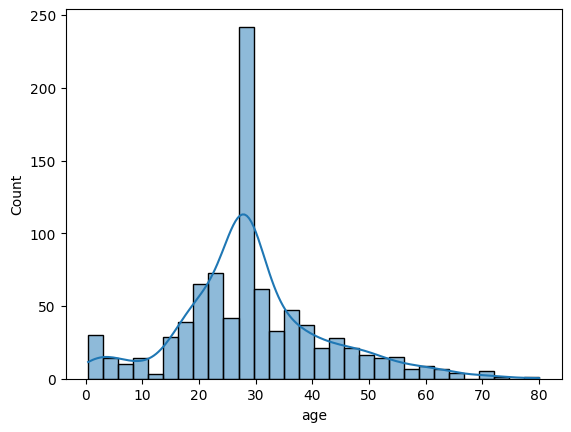

In [ ]:
print(df.describe())
print(df['gender'].value_counts())
sns.histplot(df['age'], kde=True)

# **Data Visualization**

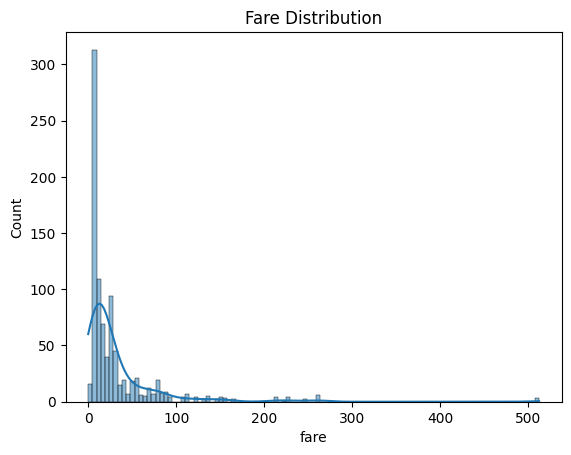

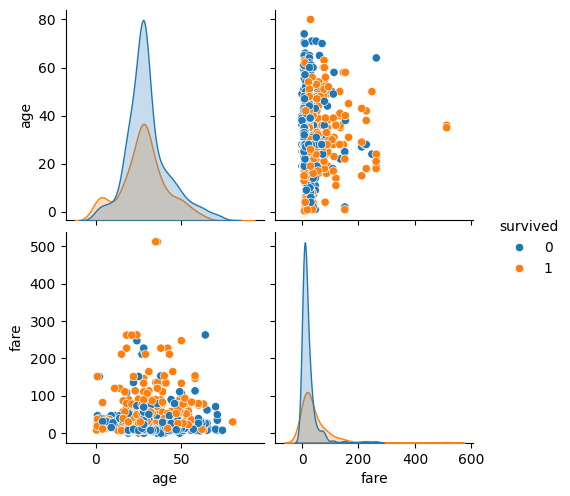

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   gender       889 non-null    category
 3   age          889 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   parch        889 non-null    int64   
 6   fare         889 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        889 non-null    category
 9   who          889 non-null    object  
 10  adult_male   889 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        889 non-null    object  
 13  alone        889 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(4)
memory usage: 80.1+ KB


In [ ]:
import matplotlib.pyplot as plt
sns.histplot(df['fare'], kde=True)
plt.title('Fare Distribution')
plt.show()
sns.pairplot(df[['age', 'fare', 'survived']], hue='survived')
plt.show()
df.info()

In [ ]:
from sklearn.preprocessing import LabelEncoder
lbl_ecdr = LabelEncoder()
df['embarked'] = lbl_ecdr.fit_transform(df['embarked'])
df['gender'] = lbl_ecdr.fit_transform(df['gender'])
df['class'] = lbl_ecdr.fit_transform(df['class'])
df['who'] = lbl_ecdr.fit_transform(df['who'])
df['adult_male']=lbl_ecdr.fit_transform(df['adult_male'])
df['alive']=lbl_ecdr.fit_transform(df['alive'])
df['embark_town']=lbl_ecdr.fit_transform(df['embark_town'])
df['alone']=lbl_ecdr.fit_transform(df['alone'])
df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   gender       889 non-null    int64  
 3   age          889 non-null    float64
 4   sibsp        889 non-null    int64  
 5   parch        889 non-null    int64  
 6   fare         889 non-null    float64
 7   embarked     889 non-null    int64  
 8   class        889 non-null    int64  
 9   who          889 non-null    int64  
 10  adult_male   889 non-null    int64  
 11  embark_town  889 non-null    int64  
 12  alive        889 non-null    int64  
 13  alone        889 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 104.2 KB


In [ ]:
df

,survived,pclass,gender,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,1,2,0,0
1,1,1,0,38.0,1,0,71.2833,0,0,2,0,0,1,0
2,1,3,0,26.0,0,0,7.9250,2,2,2,0,2,1,1
3,1,1,0,35.0,1,0,53.1000,2,0,2,0,2,1,0
4,0,3,1,35.0,0,0,8.0500,2,2,1,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,1,1,1,2,0,1
887,1,1,0,19.0,0,0,30.0000,2,0,2,0,2,1,1
888,0,3,0,28.0,1,2,23.4500,2,2,2,0,2,0,0
889,1,1,1,26.0,0,0,30.0000,0,0,1,1,0,1,1


In [ ]:
import matplotlib.pyplot as plt

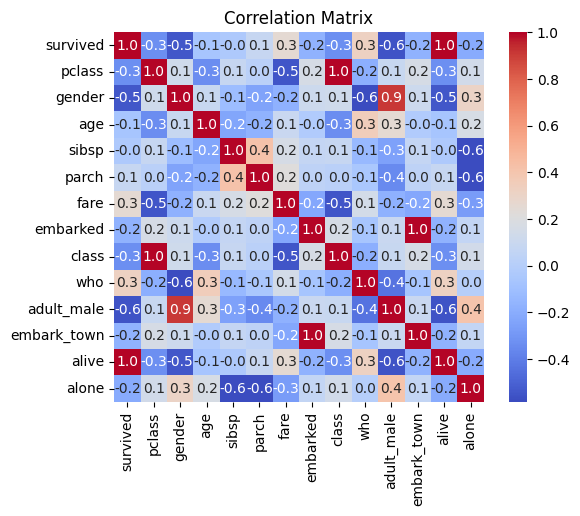

In [ ]:
# Correlation matrix
Corr_matrix = df.corr()

# Heatmap of correlation matrix
#sns.heatmap(corr_matrix, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs))
sns.heatmap(Corr_matrix,annot=True, fmt='0.01f', cmap='coolwarm',annot_kws=None, linewidths=0, robust=True,square=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
Corr_matrix

,survived,pclass,gender,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
survived,1.000000,-0.335549,-0.541585,-0.069822,-0.034040,0.083151,0.255290,-0.169718,-0.335549,0.323191,-0.555520,-0.169718,1.000000,-0.206207
pclass,-0.335549,1.000000,0.127741,-0.336512,0.081656,0.016824,-0.548193,0.164681,1.000000,-0.193029,0.090098,0.164681,-0.335549,0.138553
gender,-0.541585,0.127741,1.000000,0.086506,-0.116348,-0.247508,-0.179958,0.110320,0.127741,-0.638309,0.908250,0.110320,-0.541585,0.306985
age,-0.069822,-0.336512,0.086506,1.000000,-0.232543,-0.171485,0.093707,-0.020933,-0.336512,0.347428,0.253491,-0.020933,-0.069822,0.169518
sibsp,-0.034040,0.081656,-0.116348,-0.232543,1.000000,0.414542,0.160887,0.068900,0.081656,-0.134887,-0.255401,0.068900,-0.034040,-0.584186
parch,0.083151,0.016824,-0.247508,-0.171485,0.414542,1.000000,0.217532,0.040449,0.016824,-0.054389,-0.351945,0.040449,0.083151,-0.583112
fare,0.255290,-0.548193,-0.179958,0.093707,0.160887,0.217532,1.000000,-0.226311,-0.548193,0.143849,-0.179851,-0.226311,0.255290,-0.274079
embarked,-0.169718,0.164681,0.110320,-0.020933,0.068900,0.040449,-0.226311,1.000000,0.164681,-0.066062,0.094347,1.000000,-0.169718,0.062532
class,-0.335549,1.000000,0.127741,-0.336512,0.081656,0.016824,-0.548193,0.164681,1.000000,-0.193029,0.090098,0.164681,-0.335549,0.138553
who,0.323191,-0.193029,-0.638309,0.347428,-0.134887,-0.054389,0.143849,-0.066062,-0.193029,1.000000,-0.435459,-0.066062,0.323191,0.004125


# **Outilier Detection**

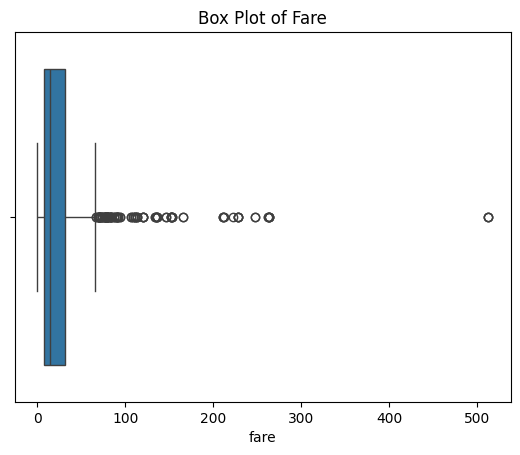

Number of outliers in fare: 20


In [ ]:
# Visual detection of outliers using a box plot
sns.boxplot(x=df['fare'])
plt.title('Box Plot of Fare')
plt.show()

# Z-score to detect outliers
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df['fare']))
outliers = df[z_scores > 3]
print(f'Number of outliers in fare: {outliers.shape[0]}')

# **Feature Engineering**

In [ ]:
# Create a new feature 'family_size'
df['family_size'] = df['sibsp'] + df['parch'] + 1

# Log transformation of 'fare' to reduce skewness
df['log_fare'] = np.log1p(df['fare'])  # Calculating the natural logarithm
# One-hot encode categorical variables (e.g., 'embarked')
df = pd.get_dummies(df, columns=['embarked'], drop_first=True)
df

,survived,pclass,gender,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,family_size,log_fare,embarked_1,embarked_2
0,0,3,1,22.0,1,0,7.2500,2,1,1,2,0,0,2,2.110213,False,True
1,1,1,0,38.0,1,0,71.2833,0,2,0,0,1,0,2,4.280593,False,False
2,1,3,0,26.0,0,0,7.9250,2,2,0,2,1,1,1,2.188856,False,True
3,1,1,0,35.0,1,0,53.1000,0,2,0,2,1,0,2,3.990834,False,True
4,0,3,1,35.0,0,0,8.0500,2,1,1,2,0,1,1,2.202765,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,1,1,1,2,0,1,1,2.639057,False,True
887,1,1,0,19.0,0,0,30.0000,0,2,0,2,1,1,1,3.433987,False,True
888,0,3,0,28.0,1,2,23.4500,2,2,0,2,0,0,4,3.196630,False,True
889,1,1,1,26.0,0,0,30.0000,0,1,1,0,1,1,1,3.433987,False,False


In [ ]:
df

,survived,pclass,gender,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,family_size,log_fare,embarked_1,embarked_2
0,0,3,1,22.0,1,0,7.2500,2,1,1,2,0,0,2,2.110213,False,True
1,1,1,0,38.0,1,0,71.2833,0,2,0,0,1,0,2,4.280593,False,False
2,1,3,0,26.0,0,0,7.9250,2,2,0,2,1,1,1,2.188856,False,True
3,1,1,0,35.0,1,0,53.1000,0,2,0,2,1,0,2,3.990834,False,True
4,0,3,1,35.0,0,0,8.0500,2,1,1,2,0,1,1,2.202765,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,1,1,1,2,0,1,1,2.639057,False,True
887,1,1,0,19.0,0,0,30.0000,0,2,0,2,1,1,1,3.433987,False,True
888,0,3,0,28.0,1,2,23.4500,2,2,0,2,0,0,4,3.196630,False,True
889,1,1,1,26.0,0,0,30.0000,0,1,1,0,1,1,1,3.433987,False,False


# **Dimensionality Reduction**

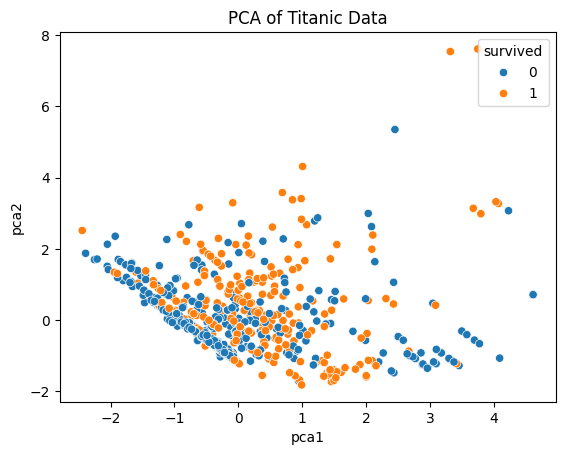

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features before PCA
features = ['age', 'fare', 'family_size']
X = StandardScaler().fit_transform(df[features])

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# Add PCA results to the DataFrame
df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]

# Visualize PCA results
sns.scatterplot(x='pca1', y='pca2', hue='survived', data=df)
plt.title('PCA of Titanic Data')
plt.show()

In [ ]:
print(X)

[[-0.56367407 -0.50023975  0.05785331]
 [ 0.66921696  0.78894661  0.05785331]
 [-0.25545131 -0.48664993 -0.5618044 ]
 ...
 [-0.10133993 -0.17408416  1.29716872]
 [-0.25545131 -0.0422126  -0.5618044 ]
 [ 0.20688282 -0.49017322 -0.5618044 ]]


# **Data Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Standardization (mean = 0, std = 1)
scaler = StandardScaler()
df[['age_scaled', 'fare_scaled']] = scaler.fit_transform(df[['age', 'fare']])
print(df[['age_scaled', 'fare_scaled']] )

# Normalization (scaling to 0-1 range)
minmax_scaler = MinMaxScaler()
df[['age_normalized', 'fare_normalized']] = minmax_scaler.fit_transform(df[['age', 'fare']])
print(df[['age_normalized', 'fare_normalized']] )

     age_scaled  fare_scaled
0     -0.563674    -0.500240
1      0.669217     0.788947
2     -0.255451    -0.486650
3      0.438050     0.422861
4      0.438050    -0.484133
..          ...          ...
886   -0.178396    -0.384475
887   -0.794841    -0.042213
888   -0.101340    -0.174084
889   -0.255451    -0.042213
890    0.206883    -0.490173

[889 rows x 2 columns]
     age_normalized  fare_normalized
0          0.271174         0.014151
1          0.472229         0.139136
2          0.321438         0.015469
3          0.434531         0.103644
4          0.434531         0.015713
..              ...              ...
886        0.334004         0.025374
887        0.233476         0.058556
888        0.346569         0.045771
889        0.321438         0.058556
890        0.396833         0.015127

[889 rows x 2 columns]


# **Initial Modeling and Hypothesis Testiing**

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define features and target variable
X = df[['age', 'fare', 'family_size']]
y = df['survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train a baseline logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Baseline model accuracy: {accuracy:.2f}')

Baseline model accuracy: 0.67


In [ ]:
summary = {
    'Dataset Shape': df.shape,
    'Missing Values': df.isnull().sum().sum(),
    'Correlation with Survival': df.corr()['survived'].sort_values(ascending=False)
}
print("EDA Summary:")
for key, value in summary.items():
    print(f"{key}: {value}")
final_df = df[['age', 'fare', 'family_size', 'survived']]

EDA Summary:
Dataset Shape: (889, 23)
Missing Values: 0
Correlation with Survival: survived           1.000000
alive              1.000000
log_fare           0.327042
who                0.323191
fare               0.255290
fare_scaled        0.255290
fare_normalized    0.255290
pca2               0.140401
pca1               0.136095
parch              0.083151
family_size        0.018277
embarked_1         0.004536
sibsp             -0.034040
age               -0.069822
age_scaled        -0.069822
age_normalized    -0.069822
embarked_2        -0.151777
embark_town       -0.169718
alone             -0.206207
pclass            -0.335549
class             -0.335549
gender            -0.541585
adult_male        -0.555520
Name: survived, dtype: float64


# Titanic Dataset: Exploratory Data Analysis and Survival Prediction

1. Introduction

This project aimed to explore the Titanic dataset and build a predictive model to determine the factors that influenced passenger survival. The sinking of the Titanic is a historical event that provides a rich dataset for analysis.

2. Data Understanding and Cleaning

The dataset was loaded using the seaborn library and initially contained 891 rows and 15 columns.
Missing values were handled by removing the 'deck' column, imputing the median age, and dropping rows with missing 'embarked' or 'embark_town' values.
Categorical features like 'gender', 'embarked', 'class', 'who', 'adult_male', 'alive', 'embark_town', and 'alone' were converted into numerical representations using Label Encoding for use in machine learning models.
The dataset was explored using descriptive statistics and visualizations to understand the distribution of variables like age, fare, and survival.
3. Exploratory Data Analysis (EDA)

Histograms and pair plots were used to visualize the distribution of key variables like age, fare, and their relationship with survival.
A correlation matrix and heatmap were generated to identify relationships between different features.
Outlier detection was performed using box plots and z-scores, focusing on the 'fare' variable.
4. Feature Engineering

New features were engineered to potentially improve model performance:
'family_size' was created by combining 'sibsp' and 'parch'.
'log_fare' was calculated to reduce skewness in the 'fare' distribution.
Categorical variables were one-hot encoded using pd.get_dummies.
5. Dimensionality Reduction

Principal Component Analysis (PCA) was applied to reduce the dimensionality of the dataset, focusing on 'age', 'fare', and 'family_size'.
The first two principal components were visualized in a scatter plot, colored by survival status.
6. Data Scaling

Standardization and normalization were applied to the 'age' and 'fare' features using StandardScaler and MinMaxScaler.
7. Initial Modeling and Hypothesis Testing

A baseline logistic regression model was trained using 'age', 'fare', and 'family_size' as predictors.
The model achieved an accuracy of approximately 0.67 on the test set.
An EDA summary was generated, including dataset shape, missing values, and correlation with survival.
8. Conclusion

This project provided an in-depth analysis of the Titanic dataset. Through EDA, feature engineering, and modeling, it attempted to identify factors contributing to passenger survival. The baseline model provided initial insights, and further model development and refinement could potentially improve predictive accuracy. The analysis highlights the importance of data cleaning, exploration, and feature engineering in building effective machine learning models.

9. Limitations

The current model is limited by its simplicity and could be improved with more sophisticated algorithms and feature engineering. Hyperparameter tuning and cross-validation might also lead to performance gains. Deeper analysis of the individual factors and their interactions could provide more nuanced insights.